In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [68]:
df = pd.read_csv("wms.csv", sep=",")
df.columns = [
    "client_id",
    "date",
    "time",
    "temparature",
    "pressure",
    "humidity",
    "wind_speed",
    "wind_direction",
    "rain",
]

In [69]:
df.wind_speed = df.wind_speed.replace("wwww", "0")

In [70]:
df.wind_speed = df.wind_speed.astype(float).head(n=5)

In [71]:
df.head(5)

,client_id,date,time,temparature,pressure,humidity,wind_speed,wind_direction,rain
0,10101,2016-10-13,12:48:16,2747.0,91061.0,4265.0,1.00,150.0,111111.0
1,10101,2016-10-13,12:54:56,2747.0,91035.0,4275.0,7.14,40.0,111111.0
2,10101,2016-10-13,12:57:16,2747.0,91044.0,4258.0,8.83,335.0,111111.0
3,10101,2016-10-13,12:59:26,2747.0,91040.0,7253.0,9.38,330.0,111111.0
4,10101,2016-10-13,13:06:16,2747.0,91022.0,4252.0,6.24,185.0,111111.0


In [72]:
df[['temparature', 'pressure', 'humidity', 'wind_speed', 'wind_direction', 'rain']] = df[['temparature', 'pressure', 'humidity', 'wind_speed', 'wind_direction', 'rain']].apply(pd.to_numeric)

In [73]:
df.describe()

,client_id,temparature,pressure,humidity,wind_speed,wind_direction,rain
count,1678.0,1677.000000,1668.000000,1678.000000,5.0000,1678.000000,1677.000000
mean,10101.0,2568.403101,111061.177050,4721.179118,6.5180,152.473021,80394.888849
std,0.0,541.269877,101565.629728,949.395945,3.3335,296.495726,46368.228269
min,10101.0,2.000000,1.000000,-699.000000,1.0000,-3.000000,0.000000
25%,10101.0,2537.000000,91031.750000,4474.000000,6.2400,1.000000,11111.000000
50%,10101.0,2747.000000,91175.000000,4563.000000,7.1400,192.000000,111111.000000
75%,10101.0,2747.000000,91272.000000,5657.000000,8.8300,282.000000,111111.000000
max,10101.0,6040.000000,599109.000000,7253.000000,9.3800,11111.000000,111111.000000


In [74]:
rain = df['rain']
rain.head(5)

0    111111.0
1    111111.0
2    111111.0
3    111111.0
4    111111.0
Name: rain, dtype: float64

In [75]:
from dateutil.parser import parse
df['date'] = df['date'].apply(parse)

In [76]:
# df_date_year = df['date'].apply(lambda x: x.strftime("%Y"))
# df_date_year.head(5)
df['date'] = df['date'].apply(lambda x: x.strftime("%Y"))

In [83]:
df_date_mean = df.groupby(['date'], axis=0).mean().reset_index()

In [86]:
df_date_mean

,date,client_id,temparature,pressure,humidity,wind_speed,wind_direction,rain
0,2002,10101,2742.583333,91164.666667,5243.291667,NaN,9.083333,111111.000000
1,2016,10101,2587.366225,91111.679232,4750.294176,6.518,161.230311,86673.913907
2,2017,10101,2338.930070,341295.819549,4325.909510,NaN,84.005105,8936.745455


In [91]:
df_mean_year = [i for i in df_date_mean['date']]
df_mean_rain = [float("{:2.2f}".format(i)) for i in df_date_mean['rain']]

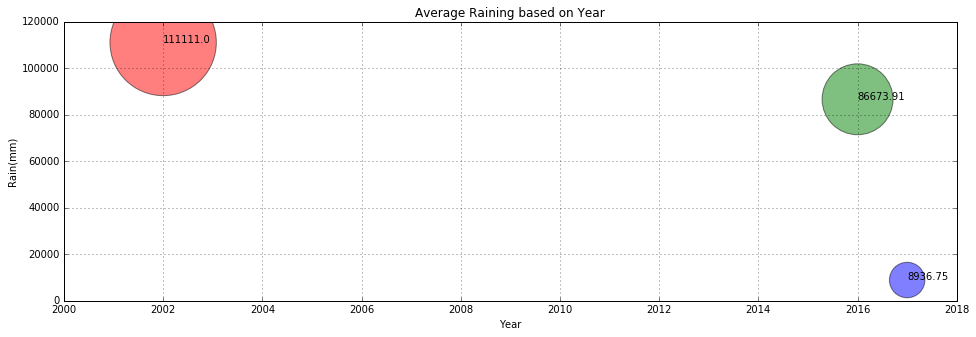

In [143]:
area = np.pi * (20 * np.array([3, 2, 1]))**2
colors = ("red", "green", "blue")
fig, ax = plt.subplots(figsize=(16, 5))
ax.scatter(df_mean_year, df_mean_rain, c = colors, s=area, alpha=0.5)

for i, j in zip(df_mean_year, df_mean_rain):
    ax.annotate(str(j), xy=(i, j))

ax.set_title('Average Raining based on Year')
ax.set_xlabel('Year')
ax.set_ylabel('Rain(mm)')
ax.grid(True)

plt.show()